In [126]:
"""The analysis.ipynb file is responsible for performing the data analysis and chi-square test for 
the newly created email_dataset.csv which consists of email header information of both phishing and non phishing emails"""

'The analysis.ipynb file is responsible for performing the data analysis and chi-square test for \nthe newly created email_dataset.csv which consists of email header information of both phishing and non phishing emails'

In [107]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from scipy.stats import chi2_contingency

Read the email dataset and replace the missing values (NaN) in the 'spf','dkim' and 'dmarc' column with the string 'unknown'

In [125]:
email_data = pd.read_csv("./email_dataset.csv")
email_data['spf'].fillna('unknown')
email_data['dkim'].fillna('unknown')
email_data['dmarc'].fillna('unknown')
email_data.head()

,filename,from,domain,sender_ip,x_sender_ip,return_path,return_path_matched_from,message_id,date,domain_age,spf,dkim,dmarc,received-spf,number_of_hops,max_delay_between_hops,has_been_forwarded,total_forwarded_times,content_type,phishing
0,./data/sample54.eml,j.patrick@ecb.com,ecb.com,195.250.48.102,195.250.48.102,j.patrick@ecb.com,True,202211151316.2AFDFqcM35061806@nhf-dc01-brk1.fv...,2022-11-15 13:15:55+00:00,9651.0,softfail,none,fail,['softfail'],8,1174.0,0,NaN,multipart/alternative,1
1,./data/sample40.eml,no-reply@access-accsecurity.com,voluptasjnqww.co.uk,89.144.9.90,89.144.9.90,bounce@voluptasjnqww.co.uk,False,1a9a2ed0-de62-4fd6-a3c6-8e5091d4f555@HE1EUR04F...,2023-08-13 18:45:06+00:00,NaN,none,none,permerror,['none'],4,1.0,0,NaN,text/html,1
2,./data/sample163.eml,service@stayfriends.de,messaggerocappuccino.it,77.91.100.118,77.91.100.118,return@messaggerocappuccino.it,False,3650ebb9-e132-4936-8f7f-47f5f8734523@AM6EUR05F...,2023-09-21 16:53:30+00:00,4906.0,pass,none,none,['pass'],4,1.0,0,NaN,text/html,1
3,./data/sample68.eml,emmettggrissomq743@gmail.com,gmail.com,209.85.160.45,209.85.160.45,emmettggrissomq743@gmail.com,True,2f712b297d35c941c3c64efb300247b1@gmail.com,2023-08-24 19:40:53+00:00,10238.0,pass,pass,pass,['pass'],6,2.0,0,NaN,multipart/mixed,1
4,./data/sample177.eml,service@stayfriends.de,bruidswinkel.site,77.91.100.82,77.91.100.82,return@bruidswinkel.site,False,71515831-b4f0-42ff-9daf-8f5e4c11e44b@DM6NAM10F...,2023-09-27 09:32:27+00:00,NaN,pass,none,none,['pass'],4,1.0,0,NaN,text/html,1


Plot the bar chart illustrating the distribution of SPF authentication results
across phishing and non-phishing emails

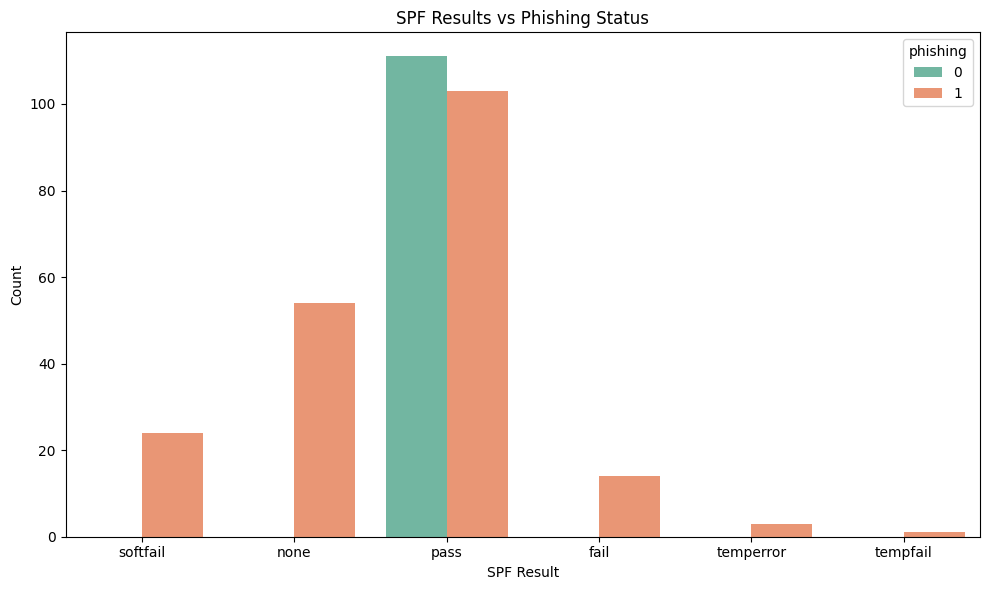

In [127]:

plt.figure(figsize=(10, 6))
sns.countplot(x='spf', hue='phishing', data=email_data, palette='Set2')
plt.title('SPF Results vs Phishing Status')
plt.xlabel('SPF Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Plot the bar chart illustrating the distribution of DKIM authentication results across phishing and non-phishing emails

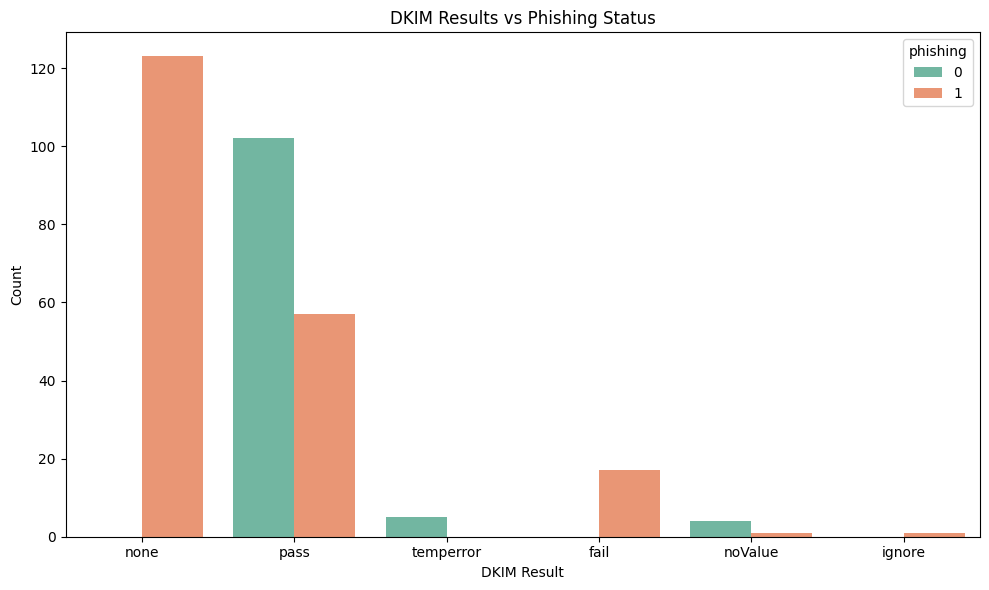

In [128]:

plt.figure(figsize=(10, 6))
sns.countplot(x='dkim', hue='phishing', data=email_data, palette='Set2')
plt.title('DKIM Results vs Phishing Status')
plt.xlabel('DKIM Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Plot the bar chart illustrating the distribution of DMARC authentication results across phishing and non-phishing emails

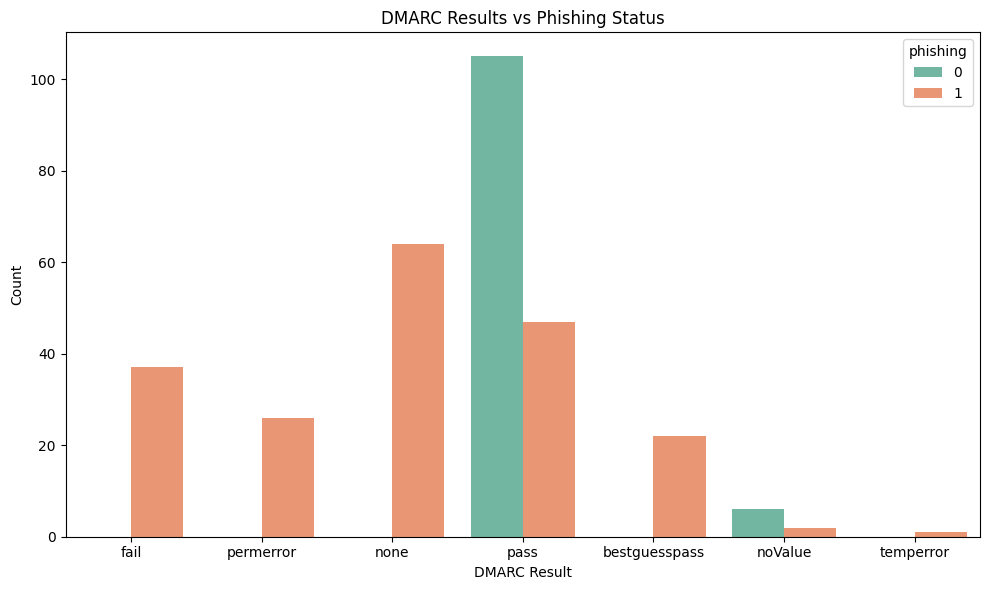

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(x='dmarc', hue='phishing', data=email_data, palette='Set2')
plt.title('DMARC Results vs Phishing Status')
plt.xlabel('DMARC Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Plot the heatmap showing the relationship between SPF authentication
results and phishing status, with color intensity representing the frequency of
emails for each combination.

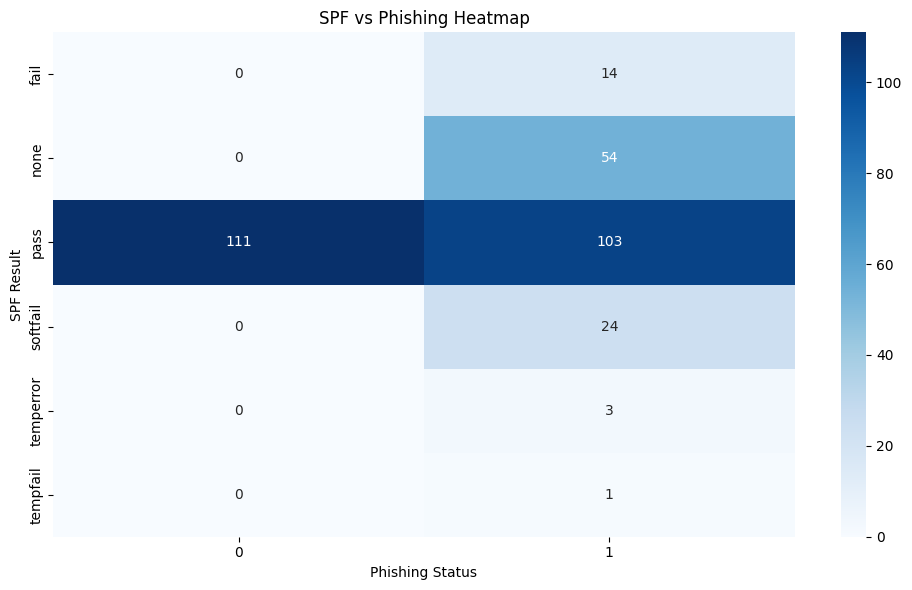

In [131]:

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['spf'], email_data['phishing']), annot=True, fmt='d', cmap='Blues')
plt.title('SPF vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('SPF Result')
plt.tight_layout()
plt.show()

Heatmap showing the relationship between DMARC authentication results and phishing status, with color intensity representing the frequency of emails for each combination.

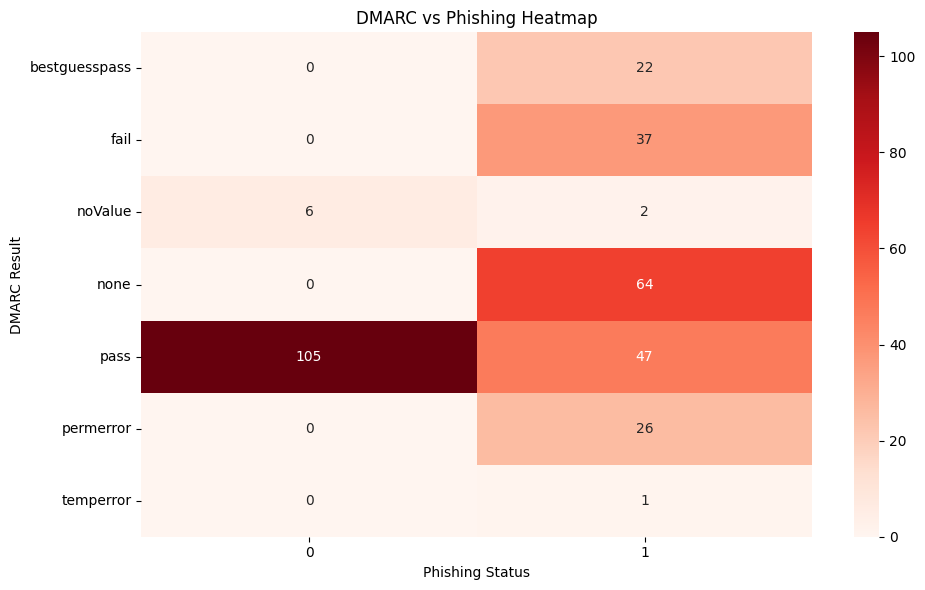

In [114]:


plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['dmarc'], email_data['phishing']), annot=True, fmt='d', cmap='Reds')
plt.title('DMARC vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('DMARC Result')
plt.tight_layout()
plt.show()


Heatmap showing the relationship between DKIM authentication results and phishing status, with color intensity representing the frequency of emails for each combination.

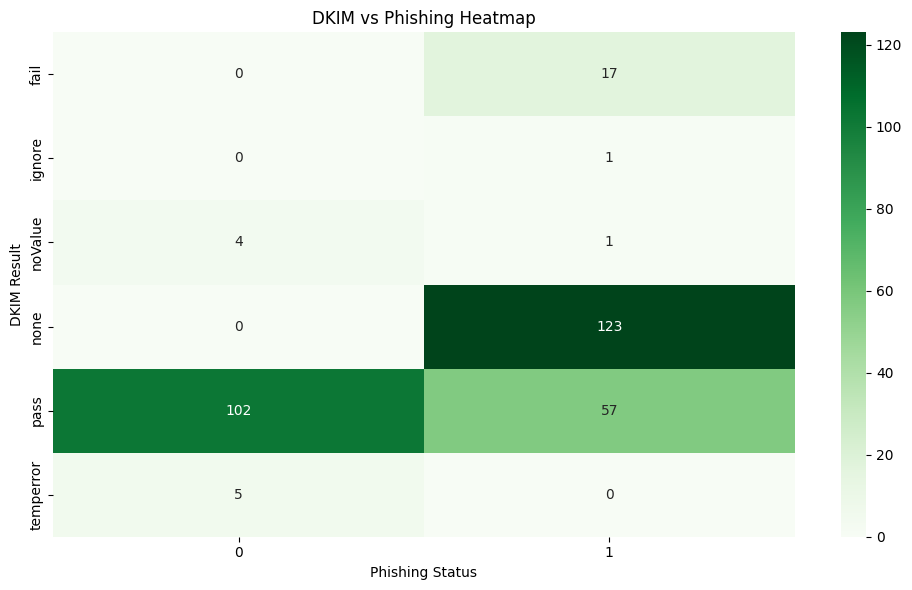

In [132]:

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['dkim'], email_data['phishing']), annot=True, fmt='d', cmap='Greens')
plt.title('DKIM vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('DKIM Result')
plt.tight_layout()
plt.show()

Plot the Bar chart comparing SPF, DKIM, and DMARC authentication results for legitimate and phishing emails, highlighting authentication patterns and their role in phishing detection


In [133]:
spf_count = email_data.groupby(['spf', 'phishing']).size().unstack(fill_value=0)
dkim_count = email_data.groupby(['dkim', 'phishing']).size().unstack(fill_value=0)
dmarc_count = email_data.groupby(['dmarc', 'phishing']).size().unstack(fill_value=0)


In [134]:
combined_count = pd.DataFrame({
    'SPF (legitimate)': spf_count[0],
    'SPF (Phishing)': spf_count[1],
    'DKIM (legitimate)': dkim_count[0],
    'DKIM (Phishing)': dkim_count[1],
    'DMARC (legitimate)': dmarc_count[0],
    'DMARC (Phishing)': dmarc_count[1]
}).fillna(0)



In [ ]:
combined_count = combined_count.T
print(combined_count)

                    bestguesspass  fail  ignore  noValue   none   pass  \
SPF (legitimate)              0.0   0.0     0.0      0.0    0.0  111.0   
SPF (Phishing)                0.0  14.0     0.0      0.0   54.0  103.0   
DKIM (legitimate)             0.0   0.0     0.0      4.0    0.0  102.0   
DKIM (Phishing)               0.0  17.0     1.0      1.0  123.0   57.0   
DMARC (legitimate)            0.0   0.0     0.0      6.0    0.0  105.0   
DMARC (Phishing)             22.0  37.0     0.0      2.0   64.0   47.0   

                    permerror  softfail  temperror  tempfail  
SPF (legitimate)          0.0       0.0        0.0       0.0  
SPF (Phishing)            0.0      24.0        3.0       1.0  
DKIM (legitimate)         0.0       0.0        5.0       0.0  
DKIM (Phishing)           0.0       0.0        0.0       0.0  
DMARC (legitimate)        0.0       0.0        0.0       0.0  
DMARC (Phishing)         26.0       0.0        1.0       0.0  


<Figure size 600x300 with 0 Axes>

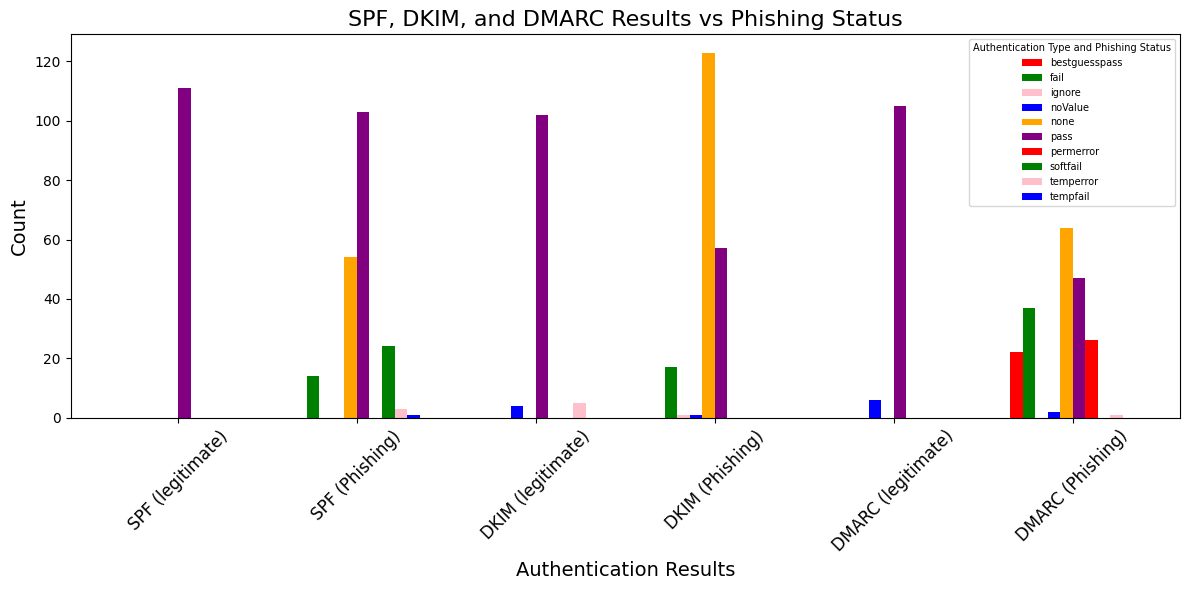

In [136]:
plt.figure(figsize=(6, 3))
combined_count.plot(
    kind='bar', 
    figsize=(12, 6), 
    width=0.7, 
    color=['red', 'green', 'pink', 'blue', 'orange', 'purple']
)

plt.title('SPF, DKIM, and DMARC Results vs Phishing Status', fontsize=16)
plt.xlabel('Authentication Results', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Authentication Type and Phishing Status', fontsize=7,title_fontsize=7)
plt.tight_layout()

plt.show()

Perform the chi square test of independence to test if there is significant relationship between email authentication headers and the email being flagged as phishing email

In [137]:
from tabulate import tabulate

In [138]:
def performChiSquareTest(data, feature, target='phishing'):
    contingency_table = pd.crosstab(data[feature], data[target])
    # print(tabulate(contingency_table,headers='keys', tablefmt='psql'))
    chi, p_value, degree_of_freedom, expected_freq = chi2_contingency(contingency_table)
    
    return {
        'feature': feature,
        'chi_statistic': chi,
        'p_value': p_value,
        'degree_of_freedom': degree_of_freedom,
        'expected_frequencies': expected_freq,
        'contingency_table': contingency_table
    }


In [139]:
auth_features = ['spf', 'dkim', 'dmarc']

chi_square_results = {feature: performChiSquareTest(email_data, feature) for feature in auth_features}

chi_square_results_summary = {
    feature: {
        'chi_statistic': result['chi_statistic'],
        'p_value': result['p_value'],
        'degree_of_freedom': result['degree_of_freedom']
    }
    for feature, result in chi_square_results.items()
}

In [140]:
print(chi_square_results_summary)

{'spf': {'chi_statistic': np.float64(77.5691541821256), 'p_value': np.float64(2.704644311221641e-15), 'degree_of_freedom': 5}, 'dkim': {'chi_statistic': np.float64(147.43599862306604), 'p_value': np.float64(4.690405362425339e-30), 'degree_of_freedom': 5}, 'dmarc': {'chi_statistic': np.float64(162.22333216580768), 'p_value': np.float64(2.002143232183971e-32), 'degree_of_freedom': 6}}
